# DAT210x - Programming with Python for DS

## Module6- Lab1

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [2]:
C = 1
kernel = 'linear'

In [3]:
# TODO: Change to 200000 once you get to Question#2
iterations = 200000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [4]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        a = model.fit(X_train, y_train)
        # .. your code here ..
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = a.score(X_test, y_test)
        # .. your code here ..
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [6]:
# .. your code here ..
X = pd.read_csv('/home/shubham/projects/DAT210x/Module6/Datasets/wheat.data', index_col=0)
display(X.head())
X.describe()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


In [7]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [8]:
# .. your code here ..
X = X.dropna(axis=1)
X[pd.isnull(X).any(axis=1)]

,area,perimeter,length,asymmetry,wheat_type
id,,,,,


In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [9]:
# .. your code here ..
y = X.wheat_type
X.drop('wheat_type', axis=1, inplace=True)
y

id
0          kama
1          kama
2          kama
3          kama
4          kama
5          kama
6          kama
7      canadian
8          kama
9          kama
10         kama
11         kama
12         kama
13         kama
14         kama
15         kama
16         kama
17         kama
18         kama
19         kama
20         kama
21         kama
22         kama
23         kama
24         kama
25         kama
26         kama
27         kama
28         kama
29         kama
         ...   
180    canadian
181    canadian
182    canadian
183    canadian
184    canadian
185    canadian
186    canadian
187    canadian
188    canadian
189    canadian
190    canadian
191    canadian
192    canadian
193    canadian
194    canadian
195    canadian
196    canadian
197    canadian
198    canadian
199    canadian
200    canadian
201    canadian
202    canadian
203    canadian
204    canadian
205    canadian
206    canadian
207    canadian
208    canadian
209    canadian
Name: wheat_type, Len

In [10]:
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

In [11]:
y.unique()

array([1, 0, 2])

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [12]:
# .. your code here ..
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [13]:
# .. your code here ..
isinstance(X_train,pd.DataFrame)
from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [14]:
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Fire it Up:

In [15]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

KNeighbors Results
('200000 Iterations Training Time: ', 51.21128797531128)
('200000 Iterations Scoring Time: ', 125.22384905815125)
('High-Dimensionality Score: ', 90.476)


/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Max 2D Score: ', 90.476)


In [16]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

SVC Results
('200000 Iterations Training Time: ', 117.22275614738464)
('200000 Iterations Scoring Time: ', 52.30783295631409)
('High-Dimensionality Score: ', 95.238)


/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Max 2D Score: ', 95.238)


/home/shubham/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


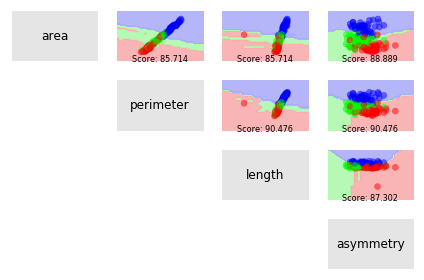

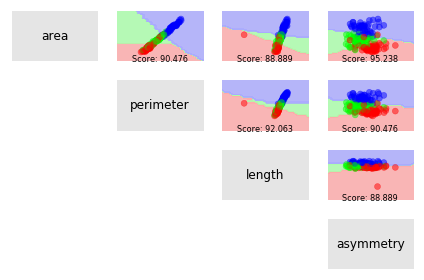

In [17]:
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.